<a href="https://colab.research.google.com/github/Mye0n9/AAI_Pitcher/blob/main/Pitcher_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import glob
import cv2
import re
import random
import json
import os
from google.colab.patches import cv2_imshow


print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.22.4
TensorFlow Version :2.12.0
Matplotlib Version :3.7.1


Reading Data (Pickle Data)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
x_Data = []
y_Data = []
for i in range(256):
  if i not in [96, 136, 146, 197, 220, 223]:
    f_path = '/content/drive/MyDrive/PKL_PITCHER/img_merged_{num}.pkl'.format(num = i)
    df = pd.read_pickle(f_path)
    for j in range(len(df)):
      x_Data.append(df['wrist'][j])
      y_Data.append(0.0)
      x_Data.append(df['elbow'][j])
      y_Data.append(1.0)
      x_Data.append(df['shoulder'][j])
      y_Data.append(2.0)

x_Data = np.array(x_Data)
y_Data = np.array(y_Data)

Train/Test split

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size=0.2, random_state=42)

In [17]:
# x_train = np.array(x_train)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

Model

In [18]:
IMG_SIZE = 32
n_class = 3
model = tf.keras.models.Sequential()
# conv 1
model.add(tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(tf.keras.layers.Dropout(rate=0.5))                          #  DO1
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# conv 2
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))                          # DO2
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# conv 3
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))                           # DO3
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(n_class, activation='softmax')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [19]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

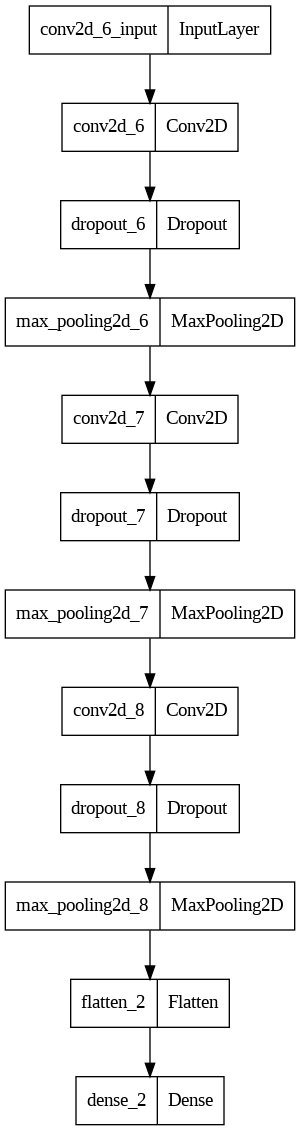

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [21]:
saved_model = '../files/pitcher_cnn3_model.h5'
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20,restore_best_weights=True)
mc = tf.keras.callbacks.ModelCheckpoint(saved_model, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [22]:
history = model.fit(x_train, y_train, epochs=100,
                      callbacks=[es,mc],
                      validation_data=(x_test, y_test)
                 )

Epoch 1/100
2038/2038 [==============================] - ETA: 0s - loss: 1.0988 - accuracy: 0.3343
Epoch 1: val_accuracy improved from -inf to 0.33078, saving model to ../files/pitcher_cnn3_model.h5
2038/2038 [==============================] - 13s 6ms/step - loss: 1.0988 - accuracy: 0.3343 - val_loss: 1.0988 - val_accuracy: 0.3308
Epoch 2/100
2038/2038 [==============================] - ETA: 0s - loss: 1.0987 - accuracy: 0.3352
Epoch 2: val_accuracy did not improve from 0.33078
2038/2038 [==============================] - 11s 5ms/step - loss: 1.0987 - accuracy: 0.3352 - val_loss: 1.0987 - val_accuracy: 0.3308
Epoch 3/100
2037/2038 [============================>.] - ETA: 0s - loss: 1.0987 - accuracy: 0.3323
Epoch 3: val_accuracy improved from 0.33078 to 0.33795, saving model to ../files/pitcher_cnn3_model.h5
2038/2038 [==============================] - 11s 5ms/step - loss: 1.0987 - accuracy: 0.3323 - val_loss: 1.0986 - val_accuracy: 0.3380
Epoch 4/100
2036/2038 [========================